In [2]:
import argparse
import gym
import importlib.util
import numpy as np

import sys
sys.argv=['']
del sys

In [4]:
parser = argparse.ArgumentParser()
parser.add_argument("--agentfile", type=str, help="file with Agent object", default="agents/qlearning_agent.py")
parser.add_argument("--env", type=str, help="Environment", default="riverswim")
args = parser.parse_args()

spec = importlib.util.spec_from_file_location('Agent', args.agentfile)
agentfile = importlib.util.module_from_spec(spec)
spec.loader.exec_module(agentfile)
reward = []

try:
    env = gym.make(args.env)
    print("Loaded ", args.env)
except:
    print(args.env +':Env')
    gym.envs.register(
        id=args.env + "-v0",
        entry_point=args.env +':Env',
    )
    env = gym.make(args.env + "-v0")
    print("Loaded", args.env)

riverswim:Env
Loaded riverswim


In [ ]:
action_dim = env.action_space.n
state_dim = env.observation_space.n

agent = agentfile.Agent(state_dim, action_dim)

observation = env.reset() # representing the current state

aggregated_rewards = {}
max_reward, max_id = 0, 0
lr = 0
for _ in range(10): # for 10 different values of the learning rate (0.1 to 1 in increments of 0.1)
    lr = 0.1 if lr + 0.1 >= 1 else lr + 0.1
    agent.learning_rate = lr
    fdf = 0
    for _ in range(10): # for 10 different values of the future discount factor (0.1 to 1 in increments of 0.1)
        rewards = []
        fdf = 0.1 if fdf + 0.1 >= 1 else fdf + 0.1
        agent.future_discount_factor = fdf
        for _ in range(5): # runs
            total_reward_gained = 0
            for _ in range(25000): # steps (if this goes to infinity we get the optimal q-table)
                # env.render()
                action = agent.act(observation) # your agent here (this takes random actions)
                observation, reward, done, info = env.step(action)
                agent.observe(observation, reward, done)

                total_reward_gained += reward
                
                if done:
                    observation = env.reset() 
            rewards.append(total_reward_gained)
        i = '(' + str(round(lr, 2)) + ', ' + str(round(fdf, 2)) + ')'
        aggregated_rewards[i] = rewards
        average_reward = sum(aggregated_rewards[i])/len(aggregated_rewards[i])
        print(i, average_reward)

        if average_reward > max_reward:
            max_reward = average_reward
            max_id = i
            print("Current best changed to: " + i)
            
print(max_reward, max_id)
env.close()

In [187]:
action_dim = env.action_space.n
state_dim = env.observation_space.n

agent = agentfile.Agent(state_dim, action_dim)

observation = env.reset() # representing the current state

aggregated_rewards = {}
max_reward, max_id = 0, 0
lr = 0
for _ in range(10): # for 10 different values of the learning rate (0.1 to 1 in increments of 0.1)
    lr = 0.1 if lr + 0.1 >= 1 else lr + 0.1
    agent.learning_rate = lr
    fdf = 0
    for _ in range(10): # for 10 different values of the future discount factor (0.1 to 1 in increments of 0.1)
        rewards = []
        fdf = 0.1 if fdf + 0.1 >= 1 else fdf + 0.1
        agent.future_discount_factor = fdf
        for _ in range(5): # runs
            total_reward_gained = 0
            for _ in range(25000): # steps (if this goes to infinity we get the optimal q-table)
                # env.render()
                action = agent.act(observation) # your agent here (this takes random actions)
                observation, reward, done, info = env.step(action)
                agent.observe(observation, reward, done)

                total_reward_gained += reward
                
                if done:
                    observation = env.reset() 
            rewards.append(total_reward_gained)
        i = '(' + str(round(lr, 2)) + ', ' + str(round(fdf, 2)) + ')'
        aggregated_rewards[i] = rewards
        average_reward = sum(aggregated_rewards[i])/len(aggregated_rewards[i])
        print(i, average_reward)

        if average_reward > max_reward:
            max_reward = average_reward
            max_id = i
            print("Current best changed to: " + i)
            
print(max_reward, max_id)
env.close()

(0.1, 0.1) 120.9989999999635
Current best changed to: (0.1, 0.1)
(0.1, 0.2) 122.8889999999609
Current best changed to: (0.1, 0.2)
(0.1, 0.3) 119.83599999996349
(0.1, 0.4) 119.92899999996341
(0.1, 0.5) 119.98599999996335
(0.1, 0.6) 120.03799999996332
(0.1, 0.7) 120.09499999996326
(0.1, 0.8) 120.11699999996324
(0.1, 0.9) 138.10799999996362
Current best changed to: (0.1, 0.9)
(0.1, 1.0) 120.00399999996334
(0.2, 0.1) 124.20699999995959
(0.2, 0.2) 120.85699999996216
(0.2, 0.3) 120.06399999996329
(0.2, 0.4) 120.05599999996329
(0.2, 0.5) 120.00399999996334
(0.2, 0.6) 120.0409999999633
(0.2, 0.7) 120.07499999996328
(0.2, 0.8) 120.02699999996332
(0.2, 0.9) 120.11599999996324
(0.2, 1.0) 120.06399999996329
(0.3, 0.1) 122.39599999996119
(0.3, 0.2) 119.98099999996336
(0.3, 0.3) 119.92599999996341
(0.3, 0.4) 121.90399999996346
(0.3, 0.5) 120.01999999996333
(0.3, 0.6) 120.08799999996327
(0.3, 0.7) 120.00599999996334
(0.3, 0.8) 120.1609999999632
(0.3, 0.9) 119.92799999996342
(0.3, 1.0) 120.03099999996

In [188]:
def get_key(dict, val):
    for key, value in dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

max_reward_over_5 = max(aggregated_rewards.values())
min_reward_over_5 = min(aggregated_rewards.values())

max_reward_mean = sum(max_reward_over_5)/len(max_reward_over_5)
min_reward_mean = sum(min_reward_over_5)/len(min_reward_over_5)

print('Best reward: ', max_reward_over_5)
print('Mean: ' + str(max_reward_mean))
print('With the parameters (learning rate, discount factor): ' + get_key(aggregated_rewards, max_reward_over_5))

print()

print('Worst reward:', min_reward_over_5)
print('Mean: ' + str(min_reward_mean))
print('With the parameters (learning rate, discount factor): ' + get_key(aggregated_rewards, min_reward_over_5))

Best reward:  [141.27499999994436, 120.23499999996314, 119.88999999996345, 119.71499999996361, 119.91999999996342]
Mean: 124.20699999995959
With the parameters (learning rate, discount factor): (0.2, 0.1)

Worst reward: [119.18499999996394, 120.14999999996321, 125.66999999996365, 120.06499999996329, 119.92499999996342]
Mean: 120.9989999999635
With the parameters (learning rate, discount factor): (0.1, 0.1)


In [235]:
parser = argparse.ArgumentParser()
parser.add_argument("--agentfile", type=str, help="file with Agent object", default="agents/dummy.py")
parser.add_argument("--env", type=str, help="Environment", default="riverswim")
args = parser.parse_args()

spec = importlib.util.spec_from_file_location('Agent', args.agentfile)
agentfile = importlib.util.module_from_spec(spec)
spec.loader.exec_module(agentfile)

try:
    env = gym.make(args.env)
    print("Loaded ", args.env)
except:
    print(args.env +':Env')
    gym.envs.register(
        id=args.env + "-v0",
        entry_point=args.env +':Env',
    )
    env = gym.make(args.env + "-v0")
    print("Loaded", args.env)

riverswim:Env
Loaded riverswim


c:\Users\gfahr\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\envs\registration.py:595: UserWarning: WARN: Overriding environment riverswim-v0
  logger.warn(f"Overriding environment {id}")


In [190]:
ction_dim = env.action_space.n
state_dim = env.observation_space.n

agent = agentfile.Agent(state_dim, action_dim)

observation = env.reset() # representing the current state

rewards = []
for _ in range(5): # runs
    total_reward_gained = 0
    for _ in range(25000): # steps (if this goes to infinity we get the optimal q-table)
        # env.render()
        action = agent.act(observation) # your agent here (this takes random actions)
        observation, reward, done, info = env.step(action)
        agent.observe(observation, reward, done)

        total_reward_gained += reward
        
        if done:
            observation = env.reset() 
    rewards.append(total_reward_gained)
        
print(sum(rewards)/len(rewards))
env.close()

57.34400000000685


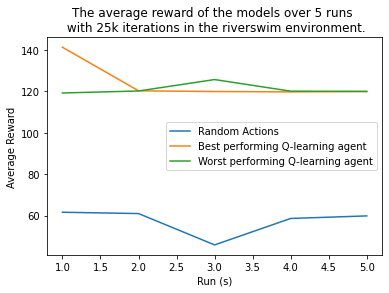

In [191]:
import matplotlib.pyplot as plt


x = np.arange(1,6,1)

fig, ax = plt.subplots()
ax.plot(x, rewards, label="Random Actions")
ax.plot(x, max_reward_over_5, label = "Best performing Q-learning agent")
ax.plot(x, min_reward_over_5, label="Worst performing Q-learning agent")
plt.xlabel('Run (s)')
plt.ylabel('Average Reward')
plt.title("The average reward of the models over 5 runs \n with 25k iterations in the riverswim environment.")
plt.legend()
plt.show()

In [193]:
ci_best_q = np.percentile(max_reward_over_5,[100*(1-0.95)/2,100*(1-(1-0.95)/2)]) 
ci_worst_q = np.percentile(min_reward_over_5,[100*(1-0.95)/2,100*(1-(1-0.95)/2)]) 
ci_random = np.percentile(rewards,[100*(1-0.95)/2,100*(1-(1-0.95)/2)]) 

print("95% confidence interval for the best agent: ", ci_best_q)
print("95% confidence interval for the best agent: ", ci_worst_q)
print("95% confidence interval for the best agent: ", ci_random)

95% confidence interval for the best agent:  [119.7325 139.171 ]
95% confidence interval for the best agent:  [119.259 125.118]
95% confidence interval for the best agent:  [47.078 61.521]


In [237]:
parser = argparse.ArgumentParser()
parser.add_argument("--agentfile", type=str, help="file with Agent object", default="agents/qlearning_agent.py")
parser.add_argument("--env", type=str, help="Environment", default="FrozenLake-v1")
args = parser.parse_args()

spec = importlib.util.spec_from_file_location('Agent', args.agentfile)
agentfile = importlib.util.module_from_spec(spec)
spec.loader.exec_module(agentfile)

In [38]:
import copy

action_dim = env.action_space.n
state_dim = env.observation_space.n

agent = agentfile.Agent(state_dim, action_dim)

observation = env.reset() # representing the current state

tables = []
for i in range(10000000): # steps (if this goes to infinity we get the optimal q-table)
    # env.render()
    action = agent.act(observation) # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)
    agent.observe(observation, reward, done)
    if i == 999999  or i % 1000000 == 0 and i != 0:
        qtable = copy.deepcopy(agent.qtable)
        tables.append(qtable)    
    if done:
        observation = env.reset() 

env.close()

In [46]:
for i, qtable in enumerate(tables):
    for state, action_values in enumerate(qtable):
        for action, value in enumerate(action_values):
            qtable[state][action] = round(value, 2)

tables[2]
            
    

array([[0.23, 0.5 ],
       [0.35, 0.91],
       [0.47, 0.75],
       [0.71, 0.86],
       [0.87, 1.78],
       [1.03, 1.84]])

In [12]:
parser = argparse.ArgumentParser()
parser.add_argument("--agentfile", type=str, help="file with Agent object", default="agents/dqlearning_agent.py")
parser.add_argument("--env", type=str, help="Environment", default="riverswim")
args = parser.parse_args()

spec = importlib.util.spec_from_file_location('Agent', args.agentfile)
agentfile = importlib.util.module_from_spec(spec)
spec.loader.exec_module(agentfile)
reward = []

try:
    env = gym.make(args.env)
    print("Loaded ", args.env)
except:
    print(args.env +':Env')
    gym.envs.register(
        id=args.env + "-v0",
        entry_point=args.env +':Env',
    )
    env = gym.make(args.env + "-v0")
    print("Loaded", args.env)

action_dim = env.action_space.n
state_dim = env.observation_space.n

agent = agentfile.Agent(state_dim, action_dim)

observation = env.reset()
for i in range(100000): 
    #env.render()
    action = agent.act(observation) # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)
    agent.observe(observation, reward, done)
    if i % 10000 == 0 and i != 0:
        print(agent.qa_table)

    if done:
        observation = env.reset() 
env.close()

riverswim:Env
Loaded riverswim
[[0.14510882 0.32877789]
 [0.20185095 0.75009907]
 [0.57407269 1.23670708]
 [0.8967029  1.35893634]
 [1.40247104 2.43637685]
 [1.66745137 3.53950234]]
[[0.14510882 0.51397933]
 [0.27370374 0.65859276]
 [0.54481965 0.94203332]
 [0.77216634 1.36203377]
 [1.19066729 1.64837307]
 [1.55988551 1.99547285]]
[[0.23520544 0.29171468]
 [0.28035126 0.65275134]
 [0.36734664 0.71629011]
 [0.65265245 1.36456513]
 [1.12326652 2.05980024]
 [1.67005355 2.02640288]]
[[0.23520544 0.29171468]
 [0.28850482 0.61305457]
 [0.41643526 0.9789409 ]
 [0.71684471 1.32782066]
 [1.16227766 1.63440175]
 [1.69018724 2.35254929]]
[[0.23520544 0.43984007]
 [0.28850482 0.43692712]
 [0.47870553 0.87893983]
 [0.68264675 1.27386419]
 [1.06171346 1.42720844]
 [1.38765808 2.81796369]]
[[0.23520544 0.46329036]
 [0.35719528 0.79328932]
 [0.51225665 0.88851421]
 [0.86568979 0.9907171 ]
 [1.17027007 1.43798066]
 [1.71455567 1.92322325]]
[[0.25166218 0.300173  ]
 [0.31400607 0.59361118]
 [0.37410314 